Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


In [11]:
# Function to load dataset
def load_dataset(filename):
    df = pd.read_csv(filename, sep="\t", header=None)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

In [12]:
# Function to plot dataset
def plot_dataset(X, y, title):
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', alpha=0.5)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


In [13]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    h = 0.02  # step size in the mesh
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


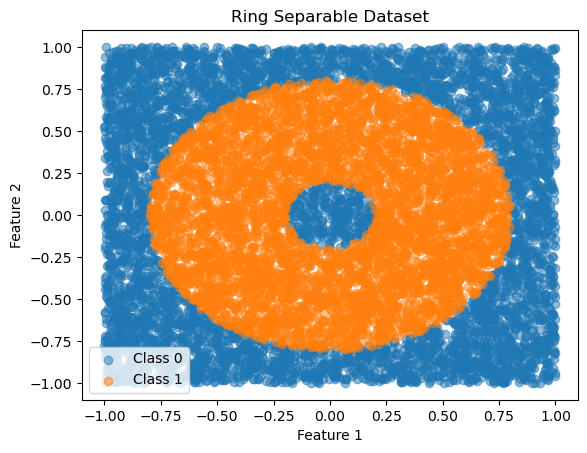

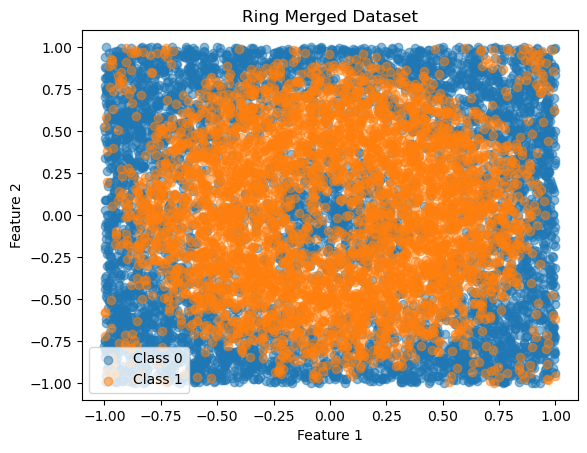

In [5]:
# Load and plot ring-separable dataset
X_separable, y_separable = load_dataset('A2-ring-separable.txt')
plot_dataset(X_separable, y_separable, "Ring Separable Dataset")

# Load and plot ring-merged dataset
X_merged, y_merged = load_dataset('A2-ring-merged.txt')
plot_dataset(X_merged, y_merged, "Ring Merged Dataset")

# Load test dataset
X_test, y_test = load_dataset('A2-ring-test.txt')

In [14]:
# Train SVM and test on separable dataset
svm_separable = SVC(kernel='linear')  # Consider changing kernel and parameters as needed
svm_separable.fit(X_separable, y_separable)
y_pred_separable = svm_separable.predict(X_test)
print("Classification Report for Ring Separable Dataset:")
print(classification_report(y_test, y_pred_separable))

Classification Report for Ring Separable Dataset:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      5333
           1       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000



In [15]:
# Train SVM and test on merged dataset
svm_merged = SVC(kernel='linear')  # Consider changing kernel and parameters as needed
svm_merged.fit(X_merged, y_merged)
y_pred_merged = svm_merged.predict(X_test)
print("Classification Report for Ring Merged Dataset:")
print(classification_report(y_test, y_pred_merged))

Classification Report for Ring Merged Dataset:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70      5333
           1       0.00      0.00      0.00      4667

    accuracy                           0.53     10000
   macro avg       0.27      0.50      0.35     10000
weighted avg       0.28      0.53      0.37     10000



In [16]:
import numpy as np

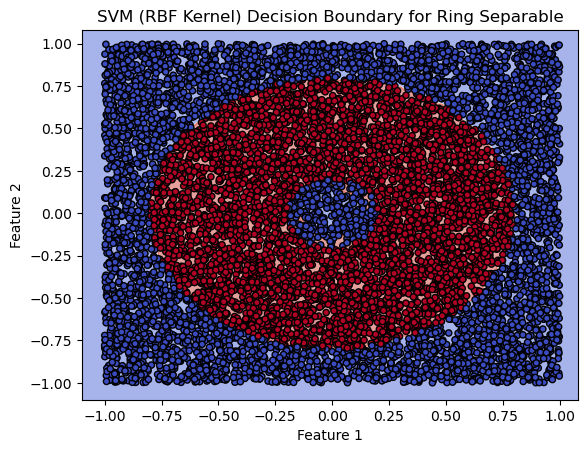

In [19]:
# Train SVM with RBF kernel and plot decision boundary for separable dataset
svm_separable_rbf = SVC(kernel='rbf')
svm_separable_rbf.fit(X_separable, y_separable)
plot_decision_boundary(X_separable, y_separable, svm_separable_rbf, "SVM (RBF Kernel) Decision Boundary for Ring Separable")

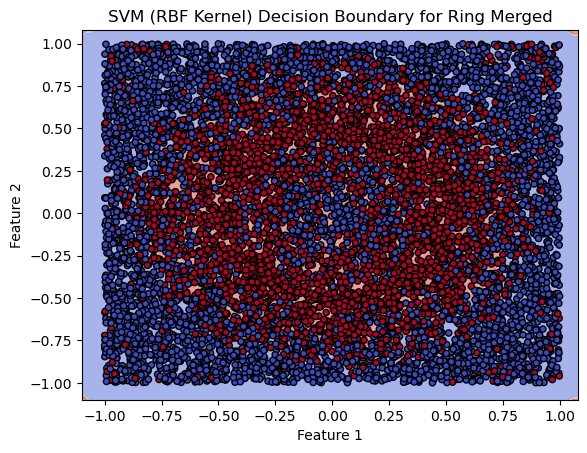

In [20]:
# Train SVM with RBF kernel and plot decision boundary for merged dataset
svm_merged_rbf = SVC(kernel='rbf')
svm_merged_rbf.fit(X_merged, y_merged)
plot_decision_boundary(X_merged, y_merged, svm_merged_rbf, "SVM (RBF Kernel) Decision Boundary for Ring Merged")

Working with bank dataset

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

In [22]:
# Load the dataset
file_path = 'bank-additional-full.csv'  # or 'bank-additional.csv' for the smaller dataset
data = pd.read_csv(file_path, sep=';')

In [23]:
# Handle categorical features
# Label encoding for categorical variables that are strings
label_encoders = {}
for column in data.select_dtypes(include=[object]).columns:
    if column != 'y':  # The target variable will be handled separately
        label_encoder = LabelEncoder()
        data[column] = label_encoder.fit_transform(data[column].astype(str))
        label_encoders[column] = label_encoder

In [24]:
# Encode the target variable
data['y'] = data['y'].map({'yes': 1, 'no': 0})

In [25]:
# Split the data into features and target
X = data.drop('y', axis=1)
y = data['y']

In [26]:
# Split the dataset into training and test sets (80% train, 20% test)
train_size = int(0.8 * len(data))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [27]:
# Feature scaling - important for SVM and many other models
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Train the SVM model
svm_model = SVC(kernel='rbf', gamma='scale')  # 'scale' is default for gamma, but it's good practice to be explicit
svm_model.fit(X_train, y_train)

SVC()

In [30]:
# Make predictions
y_pred = svm_model.predict(X_test)

In [31]:
# Print the classification report
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.99      0.82      5698
           1       0.68      0.04      0.08      2540

    accuracy                           0.70      8238
   macro avg       0.69      0.52      0.45      8238
weighted avg       0.69      0.70      0.59      8238

Accuracy: 0.6988346686088857


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# Function to load and preprocess the UniversalBank dataset
def load_universal_bank_dataset(filename):
    df = pd.read_csv(filename)
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values
    return X, y

# Load UniversalBank dataset
file_path = 'UniversalBank.csv'  # Обновленный путь к файлу
X_bank, y_bank = load_universal_bank_dataset(file_path)

# For decision boundary visualization, use only first two features
X_bank_2d = X_bank[:, :2]

# Splitting the dataset into training and testing sets (with only two features)
X_train_bank_2d, X_test_bank_2d, y_train_bank, y_test_bank = train_test_split(X_bank_2d, y_bank, test_size=0.3, random_state=42)

# Train SVM with RBF kernel for UniversalBank dataset (with only two features)
svm_bank_rbf_2d = SVC(kernel='rbf')
svm_bank_rbf_2d.fit(X_train_bank_2d, y_train_bank)

# Evaluate the model (using test set with only two features)
y_pred_bank_2d = svm_bank_rbf_2d.predict(X_test_bank_2d)
print("Classification Report for UniversalBank Dataset:")
print(classification_report(y_test_bank, y_pred_bank_2d, zero_division=1))

Classification Report for UniversalBank Dataset:
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1073
           1       1.00      0.00      0.00       427

    accuracy                           0.72      1500
   macro avg       0.86      0.50      0.42      1500
weighted avg       0.80      0.72      0.60      1500



In [36]:
from sklearn.model_selection import cross_val_score

# For the ring-separable dataset
svm_separable = SVC(kernel='linear')
scores_separable = cross_val_score(svm_separable, X_separable, y_separable, cv=10, scoring='accuracy')

# For the ring-merged dataset
svm_merged = SVC(kernel='linear')
scores_merged = cross_val_score(svm_merged, X_merged, y_merged, cv=10, scoring='accuracy')

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score

def compute_classification_error(y_true, y_pred):
    error = 1 - accuracy_score(y_true, y_pred)
    return error

def generate_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return cm
    
error_svm = compute_classification_error(y_test_bank, y_pred_bank_2d)

cm_svm = generate_confusion_matrix(y_test_bank, y_pred_bank_2d)

print("Classification Report for UniversalBank Dataset (SVM):")
print(classification_report(y_test_bank, y_pred_bank_2d, zero_division=1))
print("Classification Error (SVM):", error_svm)
print("Confusion Matrix (SVM):\n", cm_svm)

Classification Report for UniversalBank Dataset (SVM):
              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1073
           1       1.00      0.00      0.00       427

    accuracy                           0.72      1500
   macro avg       0.86      0.50      0.42      1500
weighted avg       0.80      0.72      0.60      1500

Classification Error (SVM): 0.2846666666666666
Confusion Matrix (SVM):
 [[1073    0]
 [ 427    0]]
